In [1]:
import yfinance as yf
import pandas as pd

In [2]:
carteira = ['PRIO3', 'MILS3', 'GGPS3', 'VAMO3', 'TTEN3', 'BPAC11', 'KEPL3', 'TUPY3', 'HYPE3', 'IVVB11', 'MOVI3', 'MRVE3']

In [3]:
carteira = [i + '.SA' for i in carteira]

In [4]:
carteira

['PRIO3.SA',
 'MILS3.SA',
 'GGPS3.SA',
 'VAMO3.SA',
 'TTEN3.SA',
 'BPAC11.SA',
 'KEPL3.SA',
 'TUPY3.SA',
 'HYPE3.SA',
 'IVVB11.SA',
 'MOVI3.SA',
 'MRVE3.SA']

In [5]:
dados = yf.download(carteira, start= '2023-01-01')

[*********************100%%**********************]  12 of 12 completed


In [6]:
dados.head()

Adj Close                                                         \
            BPAC11.SA   GGPS3.SA   HYPE3.SA   IVVB11.SA  KEPL3.SA   MILS3.SA   
Date                                                                           
2023-01-02  21.958847  11.061431  42.748619  227.500000  9.031393  10.000010   
2023-01-03  20.908983  10.513253  40.901035  230.500000  8.943529   9.588648   
2023-01-04  21.576189  10.650298  41.037891  232.000000  8.716935   9.627825   
2023-01-05  22.453070  10.777554  41.565777  224.880005  8.763179   9.608236   
2023-01-06  22.581488  11.032064  42.162090  224.500000  8.814047   9.676796   

                                                    ...   Volume            \
            MOVI3.SA MRVE3.SA   PRIO3.SA  TTEN3.SA  ... HYPE3.SA IVVB11.SA   
Date                                                ...                      
2023-01-02  7.080892     7.34  36.759998  9.270766  ...  2145500    129945   
2023-01-03  6.785033     7.17  34.299999  8.468489  ...  3640300    841137   
2023-01-04  7.080892     7.41  34.090000  8.537822  ...  5473900   1000098   
2023-01-05  7.327441     7.48  34.970001  8.537822  ...  4478300    669891   
2023-01-06  7.731782     7.55  35.180000  8.617059  ...  2421500    532125   

                                                                             \
           KEPL3.SA MILS3.SA MOVI3.SA  MRVE3.SA  PRIO3.SA TTEN3.SA TUPY3.SA   
Date                                                                          
2023-01-02   845200  1084900  2873800   5698200   6577200   701700   573000   
2023-01-03   940800  1410000  4051700   7863400  12918600  2218600   574200   
2023-01-04   955600   887900  3475300   9042300  10889600  1649600   730700   
2023-01-05  1431400  1240800  4204300   7627200   8847600  1205800   512800   
2023-01-06  1448800  1008200  4099600  12671200   9947800   920300   386400   

                     
           VAMO3.SA  
Date                 
2023-01-02  2921000  
2023-01-03  3282000  
2023-01-04  3677700  
2023-01-05  3490600  
2023-01-06  2082500  

[5 rows x 72 columns]

* Filtrando

In [7]:
dados_close = dados['Close']

In [8]:
normal_close = dados_close/dados_close.iloc[0]

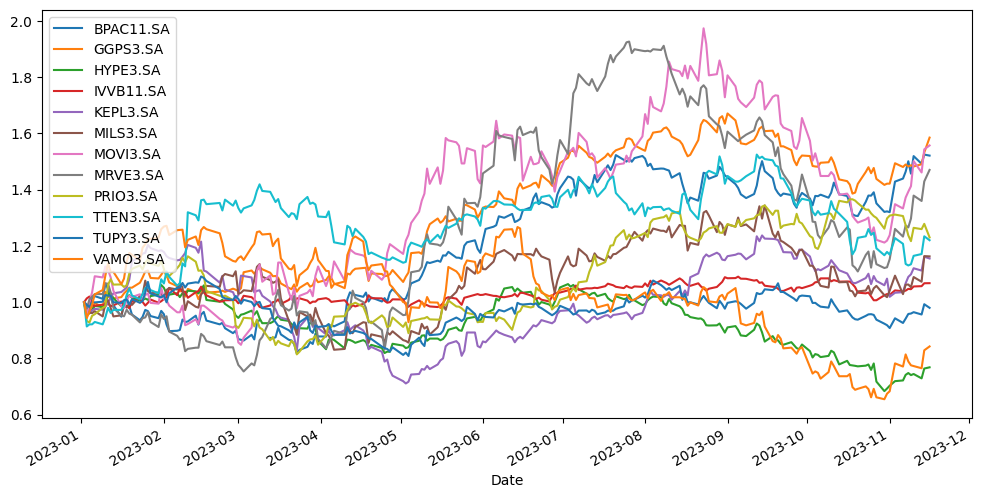

In [9]:
normal_close.plot(figsize=(12,6));

In [10]:
dados_adj = dados['Adj Close']

In [11]:
normal_adj = dados_adj/dados_adj.iloc[0]

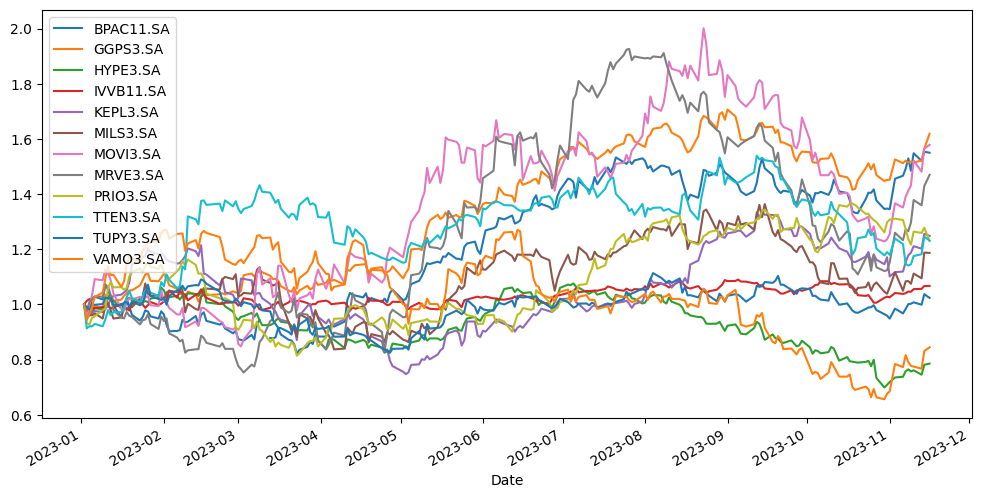

In [12]:
normal_adj.plot(figsize=(12,6));

In [13]:
normal_adj.iloc[[0, -1]].transpose()*100

Date,2023-01-02,2023-11-16
BPAC11.SA,100.0,155.017250
GGPS3.SA,100.0,161.913951
HYPE3.SA,100.0,78.575638
IVVB11.SA,100.0,106.734069
KEPL3.SA,100.0,124.897673
MILS3.SA,100.0,118.699886
MOVI3.SA,100.0,157.889715
MRVE3.SA,100.0,147.002721
PRIO3.SA,100.0,123.014155
TTEN3.SA,100.0,123.182915


# Supor que temos R$1.000 para cada ação

In [14]:
dados_adj.head()

,BPAC11.SA,GGPS3.SA,HYPE3.SA,IVVB11.SA,KEPL3.SA,MILS3.SA,MOVI3.SA,MRVE3.SA,PRIO3.SA,TTEN3.SA,TUPY3.SA,VAMO3.SA
Date,,,,,,,,,,,,
2023-01-02,21.958847,11.061431,42.748619,227.500000,9.031393,10.000010,7.080892,7.34,36.759998,9.270766,25.420971,11.575972
2023-01-03,20.908983,10.513253,40.901035,230.500000,8.943529,9.588648,6.785033,7.17,34.299999,8.468489,25.172215,10.917906
2023-01-04,21.576189,10.650298,41.037891,232.000000,8.716935,9.627825,7.080892,7.41,34.090000,8.537822,24.971296,11.187115
2023-01-05,22.453070,10.777554,41.565777,224.880005,8.763179,9.608236,7.327441,7.48,34.970001,8.537822,25.430538,11.466294
2023-01-06,22.581488,11.032064,42.162090,224.500000,8.814047,9.676796,7.731782,7.55,35.180000,8.617059,25.392269,11.895035


In [15]:
primeiro = dados_adj.iloc[0]

In [16]:
num_papeis = 1000/primeiro

In [17]:
comprados = round(num_papeis, 0)

In [18]:
comprados

BPAC11.SA     46.0
GGPS3.SA      90.0
HYPE3.SA      23.0
IVVB11.SA      4.0
KEPL3.SA     111.0
MILS3.SA     100.0
MOVI3.SA     141.0
MRVE3.SA     136.0
PRIO3.SA      27.0
TTEN3.SA     108.0
TUPY3.SA      39.0
VAMO3.SA      86.0
Name: 2023-01-02 00:00:00, dtype: float64

In [19]:
pl = comprados * dados_adj

In [20]:
pl['PL TOTAL'] = pl.sum(axis=1)

In [21]:
pl

,BPAC11.SA,GGPS3.SA,HYPE3.SA,IVVB11.SA,KEPL3.SA,MILS3.SA,MOVI3.SA,MRVE3.SA,PRIO3.SA,TTEN3.SA,TUPY3.SA,VAMO3.SA,PL TOTAL
Date,,,,,,,,,,,,,
2023-01-02,1010.106964,995.528784,983.218239,910.000000,1002.484629,1000.000954,998.405784,998.240021,992.519955,1001.242756,991.417866,995.533558,11878.699508
2023-01-03,961.813229,946.192789,940.723812,922.000000,992.731733,958.864784,956.689685,975.120010,926.099979,914.596779,981.716366,938.939899,11415.489066
2023-01-04,992.504696,958.526831,943.871502,928.000000,967.579803,962.782478,998.405784,1007.759979,920.430004,922.084751,973.880556,962.091866,11537.918250
2023-01-05,1032.841206,969.979820,956.012867,899.520020,972.712850,960.823631,1033.169211,1017.280003,944.190033,922.084751,991.790989,986.101309,11686.506689
2023-01-06,1038.748432,992.885799,969.728077,898.000000,978.359201,967.679596,1090.181324,1026.800026,949.860008,930.642345,990.298496,1022.972992,11856.156297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-09,1499.599930,1511.999931,744.740025,951.799988,1191.029949,1075.000000,1429.740048,1294.720062,1207.709988,1146.959988,994.109991,774.000000,13821.409900
2023-11-10,1564.000000,1507.500000,748.649982,960.599976,1214.339953,1111.999989,1519.979962,1376.319984,1254.690033,1177.199959,999.180033,771.420023,14205.879894
2023-11-13,1535.939972,1515.600014,733.010019,961.599976,1205.459962,1094.999981,1479.089968,1357.279938,1250.099979,1183.680004,990.599985,763.680010,14071.039807


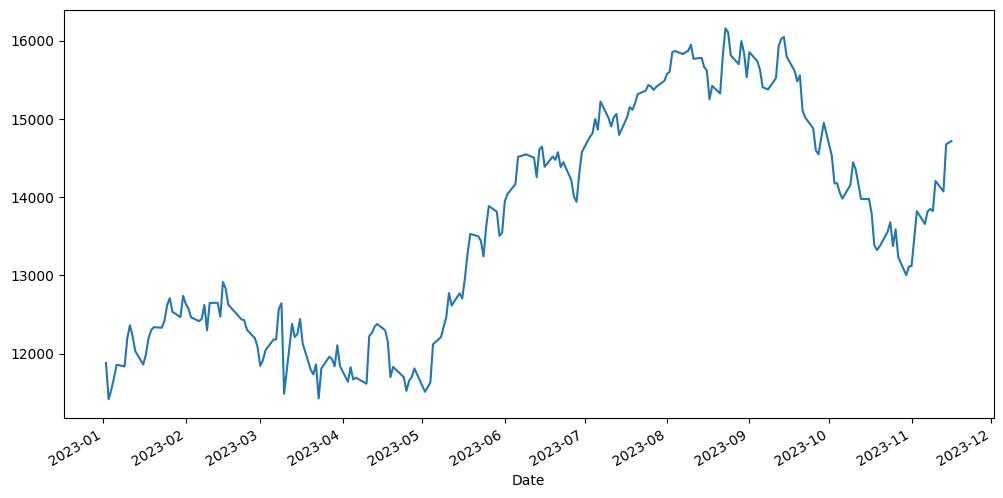

In [22]:
pl['PL TOTAL'].plot(figsize = (12,6));

In [23]:
ibov = yf.download('^BVSP', start = '2023-01-01')
ibov.rename(columns = {'Close':'IBOV'}, inplace = True)
ibov = ibov[['IBOV']]

[*********************100%%**********************]  1 of 1 completed


In [24]:
ibov

,IBOV
Date,
2023-01-02,106376.000000
2023-01-03,104166.000000
2023-01-04,105334.000000
2023-01-05,107518.000000
2023-01-06,108836.000000
...,...
2023-11-09,119012.000000
2023-11-10,120636.000000
2023-11-13,120376.000000


In [25]:
novo_df = pd.merge(ibov, pl, how = 'inner', on = 'Date')

In [26]:
novo_df.head()

,IBOV,BPAC11.SA,GGPS3.SA,HYPE3.SA,IVVB11.SA,KEPL3.SA,MILS3.SA,MOVI3.SA,MRVE3.SA,PRIO3.SA,TTEN3.SA,TUPY3.SA,VAMO3.SA,PL TOTAL
Date,,,,,,,,,,,,,,
2023-01-02,106376.0,1010.106964,995.528784,983.218239,910.00000,1002.484629,1000.000954,998.405784,998.240021,992.519955,1001.242756,991.417866,995.533558,11878.699508
2023-01-03,104166.0,961.813229,946.192789,940.723812,922.00000,992.731733,958.864784,956.689685,975.120010,926.099979,914.596779,981.716366,938.939899,11415.489066
2023-01-04,105334.0,992.504696,958.526831,943.871502,928.00000,967.579803,962.782478,998.405784,1007.759979,920.430004,922.084751,973.880556,962.091866,11537.918250
2023-01-05,107518.0,1032.841206,969.979820,956.012867,899.52002,972.712850,960.823631,1033.169211,1017.280003,944.190033,922.084751,991.790989,986.101309,11686.506689
2023-01-06,108836.0,1038.748432,992.885799,969.728077,898.00000,978.359201,967.679596,1090.181324,1026.800026,949.860008,930.642345,990.298496,1022.972992,11856.156297


In [27]:
normalizado = (novo_df/novo_df.iloc[0])*100

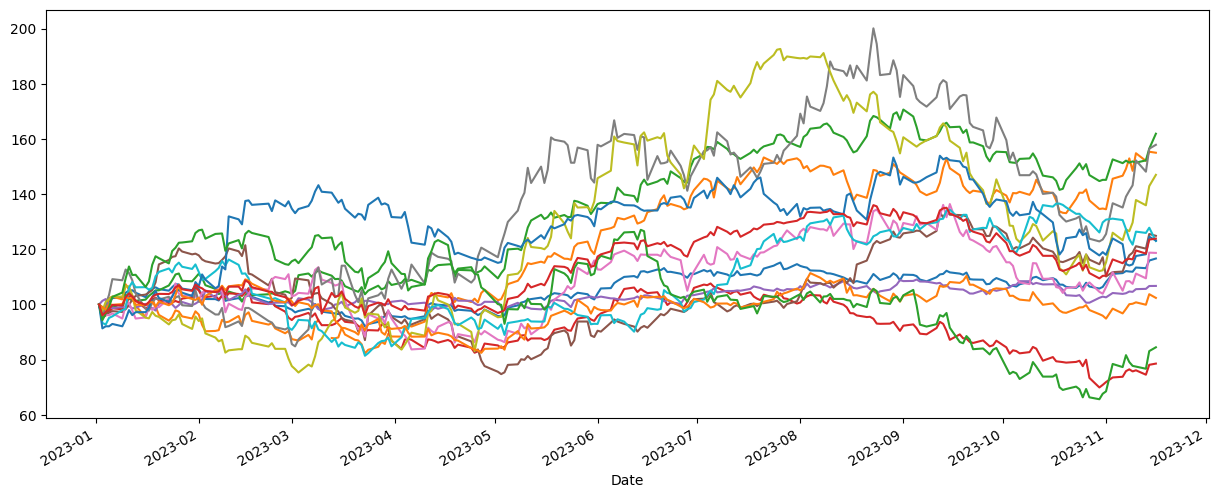

In [28]:
normalizado.plot(figsize= (15,6), legend= False);

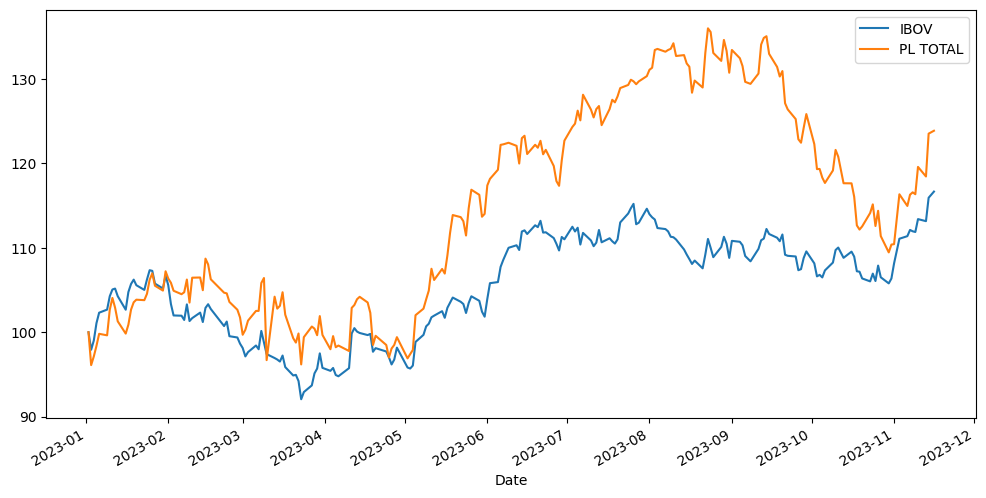

In [29]:
# Plot somente IBOV e carteira (PL)

normalizado[['IBOV', 'PL TOTAL']].plot(figsize = (12,6));

In [31]:
import plotly.graph_objects as go

In [50]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=normalizado.index, y=normalizado['BPAC11.SA'], name = 'Cotação de BPAC11'))
fig.add_trace(go.Scatter(x=normalizado.index, y=normalizado['GGPS3.SA'], name = 'Cotação de GGPS3'))
fig.add_trace(go.Scatter(x=normalizado.index, y=normalizado['IBOV'], name = 'IBOV'))
fig.add_trace(go.Scatter(x=normalizado.index, y=normalizado['IVVB11.SA'], name = 'Cotação de IVVB11'))
fig.add_trace(go.Scatter(x=normalizado.index, y=normalizado['KEPL3.SA'], name = 'Cotação de KEPL3'))
fig.add_trace(go.Scatter(x=normalizado.index, y=normalizado['MILS3.SA'], name = 'Cotação de MILS3'))
fig.add_trace(go.Scatter(x=normalizado.index, y=normalizado['MOVI3.SA'], name = 'Cotação de MOVI3'))
fig.add_trace(go.Scatter(x=normalizado.index, y=normalizado['MRVE3.SA'], name = 'Cotação de MRVE3'))
fig.add_trace(go.Scatter(x=normalizado.index, y=normalizado['PRIO3.SA'], name = 'Cotação de PRIO3'))
fig.add_trace(go.Scatter(x=normalizado.index, y=normalizado['TTEN3.SA'], name = 'Cotação de TTEN3'))
fig.add_trace(go.Scatter(x=normalizado.index, y=normalizado['TUPY3.SA'], name = 'Cotação de TUPY3'))
fig.add_trace(go.Scatter(x=normalizado.index, y=normalizado['VAMO3.SA'], name = 'Cotação de VAMO3'))


fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20), 
                  template = 'simple_white',
                  paper_bgcolor="#f7f8fa", width=1000,height=400)

fig.show()

In [51]:
import plotly.express as px

In [110]:
fig = px.line(normalizado, x=normalizado.index, y = carteira, title= 'x', labels = {'value': 'Variação','Date': 'Data', 'variable': 'Ações'})

fig.update_layout(xaxis_rangeslider_visible=False,
                  template = 'simple_white',
                  title=dict(text="Portfólio recomendado out/2023 Nord Research", font=dict(size=30), automargin=False),
                  paper_bgcolor="#f7f8fa", width=1000,height=500)

fig.show()

c:\Users\brubr\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

